In [1]:
import os

In [2]:
os.getcwd()

'/Users/rujalshrestha/Projects/mac-migration/gisc-412/lab4'

In [3]:
# !pip install osmnx numpy pandas matplotlib

In [4]:
import osmnx as ox
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

place = "University of Canterbury"

network = ox.graph_from_place(place)

In [6]:
north = -43.5199121
south = -43.528178
east = 172.5883328
west = 172.5728817

In [7]:
network = ox.graph_from_bbox((north, south, east, west), network_type='all')

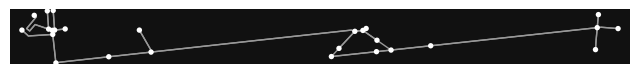

In [8]:
fig, ax = ox.plot_graph(network)

In [9]:
nodes, edges = ox.graph_to_gdfs(network)

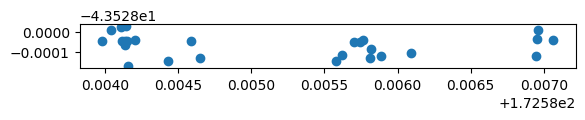

In [10]:
nodes.plot()
plt.show()

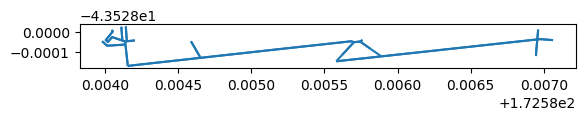

In [11]:
edges.plot()
plt.show()

In [12]:
import geopandas as gpd
from shapely.geometry import Point

In [13]:
address_list = [
    "11A Montana Avenue, Christchurch, New Zealand",
    "9 Zenith Place, Christchurch, New Zealand",
    "611 Cashel Street, Christchurch, New Zealand",
    "108 Clarence Street, Riccarton, Christchurch, New Zealand",
    "10 Feather Place, Rolleston, New Zealand"
]

In [14]:
geom = []  # List to store Point geometries

# Loop through the address list and geocode each address
for address in address_list:
    geocode_result = ox.geocode(address)
    if geocode_result is not None: # Check if geocoding found a result
        y, x = geocode_result
        point = Point(x, y)  # Create a Point geometry
        geom.append(point)    # Add the Point to the list

# Create GeoDataFrame with a dictionary of attributes and a list of geometries
gdf = gpd.GeoDataFrame({'Address': address_list}, geometry=geom, crs=4326)

# Print the GeoDataFrame
print(gdf)

                                             Address  \
0      11A Montana Avenue, Christchurch, New Zealand   
1          9 Zenith Place, Christchurch, New Zealand   
2       611 Cashel Street, Christchurch, New Zealand   
3  108 Clarence Street, Riccarton, Christchurch, ...   
4           10 Feather Place, Rolleston, New Zealand   

                      geometry  
0  POINT (172.58158 -43.52062)  
1  POINT (172.53609 -43.53042)  
2  POINT (172.66874 -43.53287)  
3   POINT (172.6034 -43.53681)  
4  POINT (172.40962 -43.60664)  


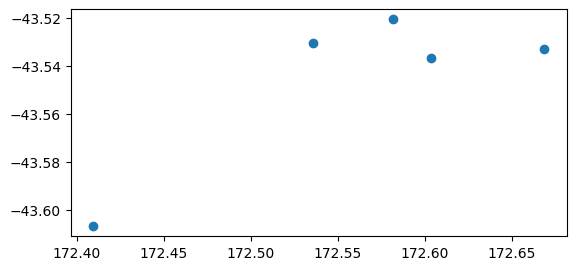

In [15]:
gdf.plot()
plt.show()

In [16]:
import networkx as nx

In [17]:
start_point = (-43.522804, 172.583258)  # Latitude and longitude for BT
end_point = (-43.521537568382065, 172.57975565615905) # Latitude and longitude for security

In [18]:
start_node = ox.distance.nearest_nodes(network, start_point[1], start_point[0])
end_node = ox.distance.nearest_nodes(network, end_point[1], end_point[0])

In [19]:
route = nx.shortest_path(network, source=start_node, target=end_node, weight='length')

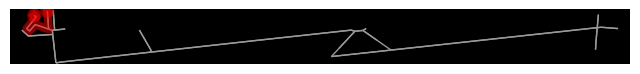

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [21]:
ox.plot_graph_route(network,route,route_linewidth=6,node_size=0,bgcolor='k')

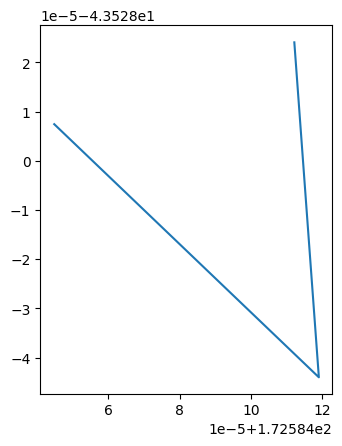

In [22]:
from shapely.geometry import LineString

# Convert the route to a list of (latitude, longitude) coordinates
route_coordinates = [(network.nodes[node]['x'],network.nodes[node]['y']) for node in route]

# Convert the list of coordinates into a LineString geometry
route_line = LineString(route_coordinates)

# Create a GeoDataFrame with the LineString geometry
route_gdf = gpd.GeoDataFrame({'geometry': [route_line]}, crs=4326)

# Inspect the result
route_gdf.plot()
plt.show()

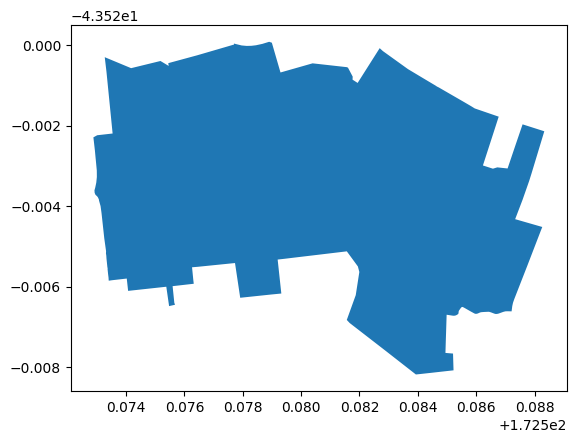

In [23]:
area = ox.geocode_to_gdf(place)

area.plot()
plt.show()

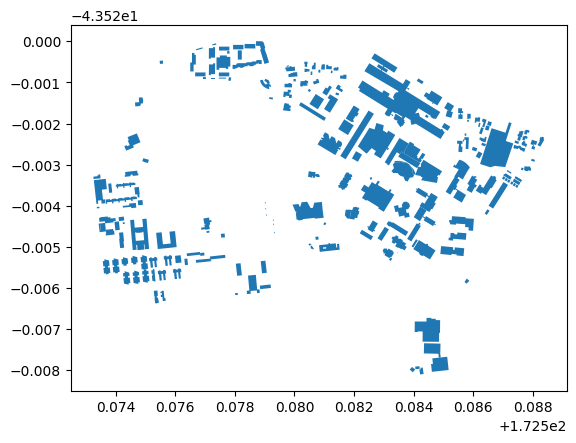

In [25]:
buildings = ox.features_from_place(place, tags={"building": True})

buildings.plot()
plt.show()

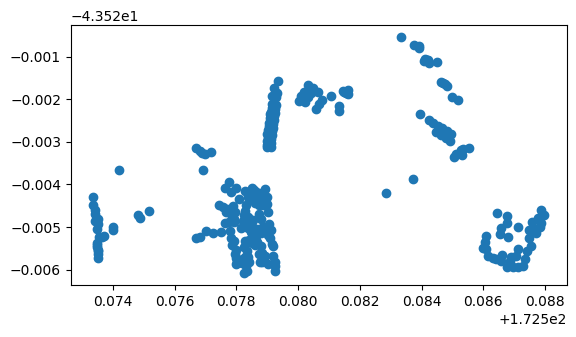

In [26]:
trees = ox.features_from_place(place, tags={'natural': 'tree'})

trees.plot()
plt.show()

<Axes: >

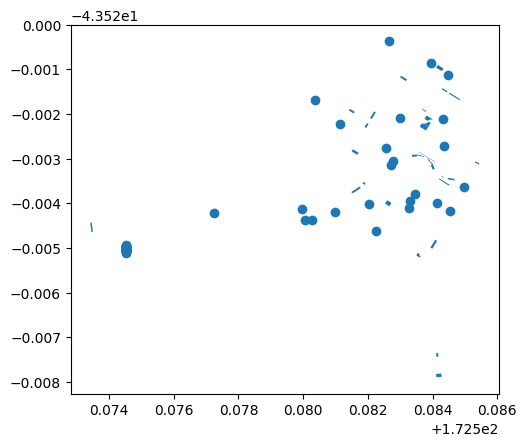

In [27]:
bike_parkings = ox.features_from_place(place, tags={'amenity': 'bicycle_parking'})

bike_parkings.plot()

<Axes: >

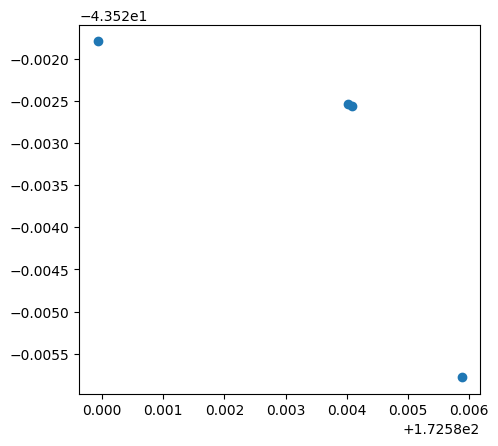

In [28]:
charging_stations = ox.features_from_place(place, tags={'amenity': 'charging_station'})

charging_stations.plot()

In [29]:
import pandas as pd

In [31]:
pd.unique(buildings.building)

array(['university', 'dormitory', 'yes', 'warehouse', 'retail', 'church',
       'industrial', 'house', 'service', 'shed', 'roof', 'no', 'detached',
       'semidetached_house', 'kindergarten', 'construction'], dtype=object)

In [32]:
print(buildings)

                                                              geometry  \
element  id                                                              
relation 13308076    POLYGON ((172.58432 -43.52522, 172.58431 -43.5...   
         13308526    POLYGON ((172.57367 -43.52472, 172.57366 -43.5...   
         13308950    POLYGON ((172.58449 -43.52375, 172.58452 -43.5...   
         13312328    POLYGON ((172.58315 -43.52259, 172.58317 -43.5...   
         13312342    POLYGON ((172.58439 -43.52276, 172.5843 -43.52...   
...                                                                ...   
way      1312589425  POLYGON ((172.58566 -43.52239, 172.5857 -43.52...   
         1363535156  POLYGON ((172.57479 -43.52148, 172.57477 -43.5...   
         1363535157  POLYGON ((172.57492 -43.52285, 172.57511 -43.5...   
         1391745188  POLYGON ((172.58213 -43.52293, 172.58205 -43.5...   
         1394097286  POLYGON ((172.57536 -43.52466, 172.57541 -43.5...   

                        addr:city add

In [34]:
buildings.shape

(208, 64)

In [35]:
buildings_sel = buildings[['geometry', 'name']]

buildings_sel.head(2)

geometry  \
element  id                                                            
relation 13308076  POLYGON ((172.58432 -43.52522, 172.58431 -43.5...   
         13308526  POLYGON ((172.57367 -43.52472, 172.57366 -43.5...   

                          name  
element  id                     
relation 13308076     Meremere  
         13308526  Nancy Simms

In [36]:
buildings_sel.to_file('data/buildings.shp')

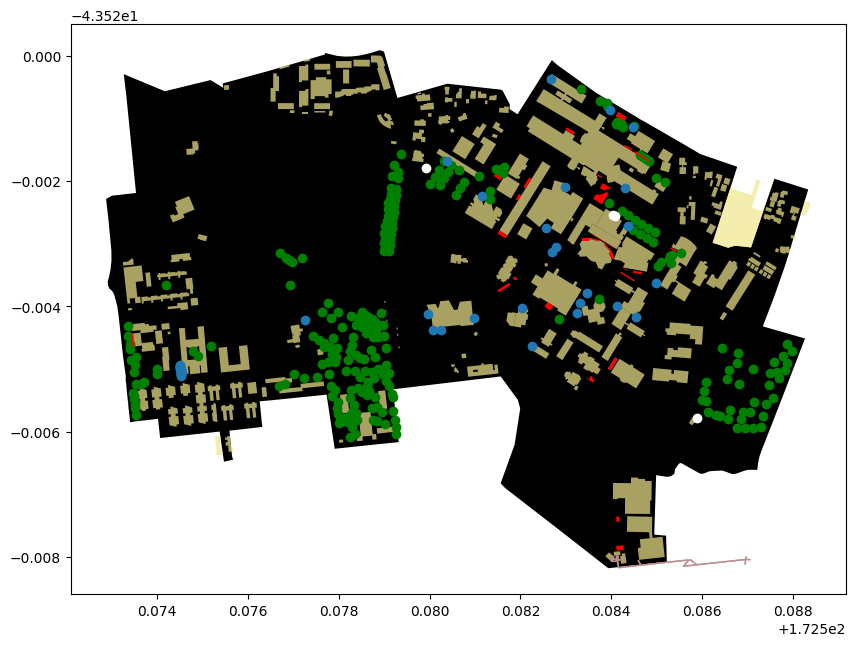

In [53]:
fig, eixo = plt.subplots(figsize=(10, 10))

area.plot(ax=eixo, facecolor="black")

edges.plot(ax = eixo, linewidth=1, edgecolor="#BC8F8F")

buildings.plot(ax=eixo, facecolor="khaki", alpha=0.7)

trees.plot(ax=eixo, facecolor="green")

bike_parkings.plot(ax=eixo, facecolor="red")

charging_stations.plot(ax=eixo, facecolor="white")

plt.show()


In [50]:
# Import the necessary libraries
import requests
import json
import geopandas as gpd

# Define the API endpoint URL
endpoint = 'https://gis.ccc.govt.nz/server/rest/services/OpenData/StormWater/FeatureServer/16/query?outFields=*&where=1%3D1&f=geojson'

# Send a GET request to the API endpoint and retrieve the JSON response
response = requests.get(endpoint)

# Parse the JSON response into a dictionary
data = response.json()

# Extract the GeoJSON features from the dictionary
geojson_data = data['features']

# Create a GeoDataFrame from the GeoJSON features with the specified CRS
gdf = gpd.GeoDataFrame.from_features(geojson_data, crs=4326)  # WGS84

# Inspect the result
gdf.head(5)

,geometry,SwStructureID,Type,ServiceStatus,Ownership,Responsibility,Maintenance,LocationCertainty,InstallationCompany,Construction,...,CommissionDate,DecommissionDate,Comment,Project,ContractorExternalReference,SAPInternalReference,CreateDate,LastEditDate,Shape__Area,Shape__Length
0,"POLYGON ((172.71018 -43.48229, 172.71018 -43.4...",2,Manhole,In Service,CCC,Land Drainage Operations,Land Drainage Operations,Accurate,None,None,...,NaN,NaN,None,None,None,IE000000000010307748,NaN,1363917352000,4.841305,8.801498
1,"POLYGON ((172.71176 -43.48227, 172.71176 -43.4...",3,Manhole,In Service,CCC,Land Drainage Operations,Land Drainage Operations,Accurate,None,None,...,NaN,NaN,None,None,None,IE000000000010308026,NaN,1590707953000,6.535316,9.890124
2,"POLYGON ((172.7117 -43.48146, 172.7117 -43.481...",4,Manhole,In Service,CCC,Land Drainage Operations,Land Drainage Operations,Accurate,None,None,...,NaN,NaN,None,None,None,IE000000000010308296,NaN,1590707953000,2.321603,6.133053
3,"POLYGON ((172.71252 -43.48226, 172.71252 -43.4...",5,Manhole,In Service,CCC,Land Drainage Operations,Land Drainage Operations,Accurate,None,None,...,NaN,NaN,None,None,None,IE000000000010308555,NaN,1590707953000,3.031829,7.086492
4,"POLYGON ((172.71406 -43.48183, 172.71407 -43.4...",7,Manhole,In Service,CCC,Land Drainage Operations,Land Drainage Operations,Accurate,None,None,...,NaN,NaN,None,None,None,IE000000000010309080,NaN,1590707953000,4.573913,8.556871


<Axes: >

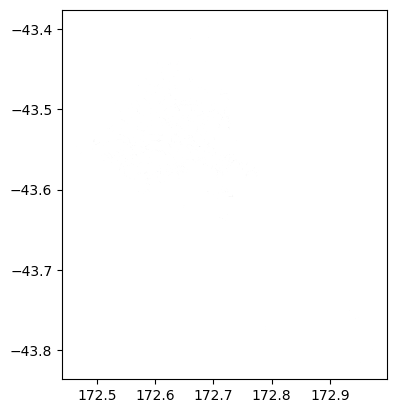